In this notebook, we use refin crawled text provided by cohort 13 to extract important features for multi-label classification task

**Import Libraries**

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/Colab Notebooks/fellowship.ai/"
cd /content/gdrive/My Drive/Colab Notebooks/fellowship.ai/

**Load  data**

In [4]:
df = pd.read_json('https://drive.google.com/uc?export=download&id=12pI7njO-k_24gli2rUU7u5AW6IoaDpVv',orient='records')
df.head()

,0,1
0,1375,{'Bedroom Information': ['# of Bedrooms (Above...
1,3348,"{'Listing Information': ['Move-In Date: ', 'We..."
2,11666,{'Virtual Tour': ['Virtual Tour (External Link...
3,9745,"{'Listing Information': ['Listing Type: ', 'Si..."
4,8857,{'Virtual Tour': ['Virtual Tour (External Link...


In [0]:
#sort and convert json information for each listing into columns
df_sorted = df.sort_values(by=[0])
df_sorted.head()
new_df = pd.DataFrame()
frames = []
for i, row in enumerate(df_sorted.iterrows()):
    frame = pd.DataFrame(pd.Series(row[1][1])).T
    frame.index = [row[1][0]]
    frames.append(frame)
new_df = new_df.append(frames,sort=False)

In [150]:
new_df.head()

,Virtual Tour,Parking Information,Multi-Unit Information,Association Fee,Bathroom Information,Interior Features,Room Information,Heating & Cooling,Building Information,Exterior Features,School Information,Utility Information,Tax Information,Location Information,Property Features,Property Information,Lot Information,Listing Information,Utilities Information,Bedroom Information,Dining Room Information,Interior Information,Exterior Information,Pool Information,Land Information,Flooring Information,Parking & Garage,Homeowners Association Information,Neighborhood Information,Leasing Information,Pet Information,Community Information,Room 1 Information,Room 2 Information,Room 3 Information,Room 4 Information,Room 5 Information,Room 6 Information,Room 7 Information,Room 8 Information,...,Room Information 6,Room Information 7,Room Information 8,Room Information 9,Room Information 10,Room Information 11,Room Information 12,Room 19,Room 20,Bedroom 3 Information,Listing Location,Misc Information,Building 2 Information,Unit 1 Info,Unit 2 Info,Unit 3 Info,Parking 3 Information,Accessibilty Features,Mobile Home Features,School District Information,Multi-Family Financials (Annual),Additional Structure Garage,Additional Structure #3,Additional Structure #4,Additional Structure #5,Additional Structure #6,Green Home Features,Two Family 2nd Unit,Bedroom 4 Information,Bedroom 5 Information,Multi - Unit Information,Other Room #4 Information,Other Room #5 Information,Other Room #6 Information,Other Room 14,Other Room 15,Office & Agent Information,Multi-Unit Income & Expenses,Green Property Information,Farm & Ranch Details
0,"[Virtual Tour Available: , Yes]","[3 Car Or More, Attached, Kitchen Level Entry]","[Unit/Lot Number: , 16]","[Initiation Fee: , $200, Annual Association Fe...","[# of Bathrooms (Full): , 5]","[# of Fireplaces: , 1, Fireplace Type: , Facto...","[Dining Room Seats 12+, Dining Room - Separate...","[Heating Type: , Central, Forced Air, Heat Pum...","[Construction Status: , Under Construction]","[Roof Type: , Composition, Tile]","[Elementary School Bus: , Yes, Middle School B...","[Water/Sewer: , Public Water, Sewer In Street,...","[Taxes: , $4,444, Tax Year: , 2019]","[District: , 9F, Subdivision: , Whispering Wll...","[Neighborhood Association, Sidewalks, Street L...","[Construction: , Brick Front, Concrete Siding,...","[Land Lot: , 164, Lot Size: , Less than 1/3 Ac...","[Public Remarks: , The Abigail I Plan built by...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[Virtual Tour (External Link)],"[# of Carport Spaces: , 3, Carport Description...",NaN,NaN,"[# of Baths (Full): , 2, Combination Tub & Sho...",NaN,"[Rooms Description: , Utility Room/Laundry]",NaN,"[Construction Type: , Concrete Block Construct...",NaN,NaN,NaN,"[Tax Reflects Homestead Tax, Tax Amount: , $5,...","[Directions: , first left off light house driv...",NaN,"[Pool Only, One Story, Detached, Parcel Number...",NaN,"[Possession Information: , Funding]","[Cooling Description: , Ceiling Fans, Central ...","[Bedroom Description: , At Least 1 Bedroom Gro...","[Dining Description: , Dining/Living Room]","[Equipment Appliances: , Dishwasher, Disposal,...","[High Impact Doors, Patio]","[Has Pool, Below Ground Pool, Pool Dimensions:...",[Less Than 1/4 Acre Lot],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,"[# of Full Bathrooms: , 4]","[Appliances: , Built-In Oven, Cooktop, Dishwas...","[Room Count: , 3]","[Cooling: , Central Air, Heating: , Central]","[Year Built: , 2018, New Construction, Constru...","[Exterior Features: , Hurricane Shutters, Irri...",NaN,"[Utilities: , Ele

In [161]:
new_df.shape

(18269, 528)

**This implies that we have 18629 listings with 528 features information in each of them. That seems a lot of data. Now,  let's first check for missing values**

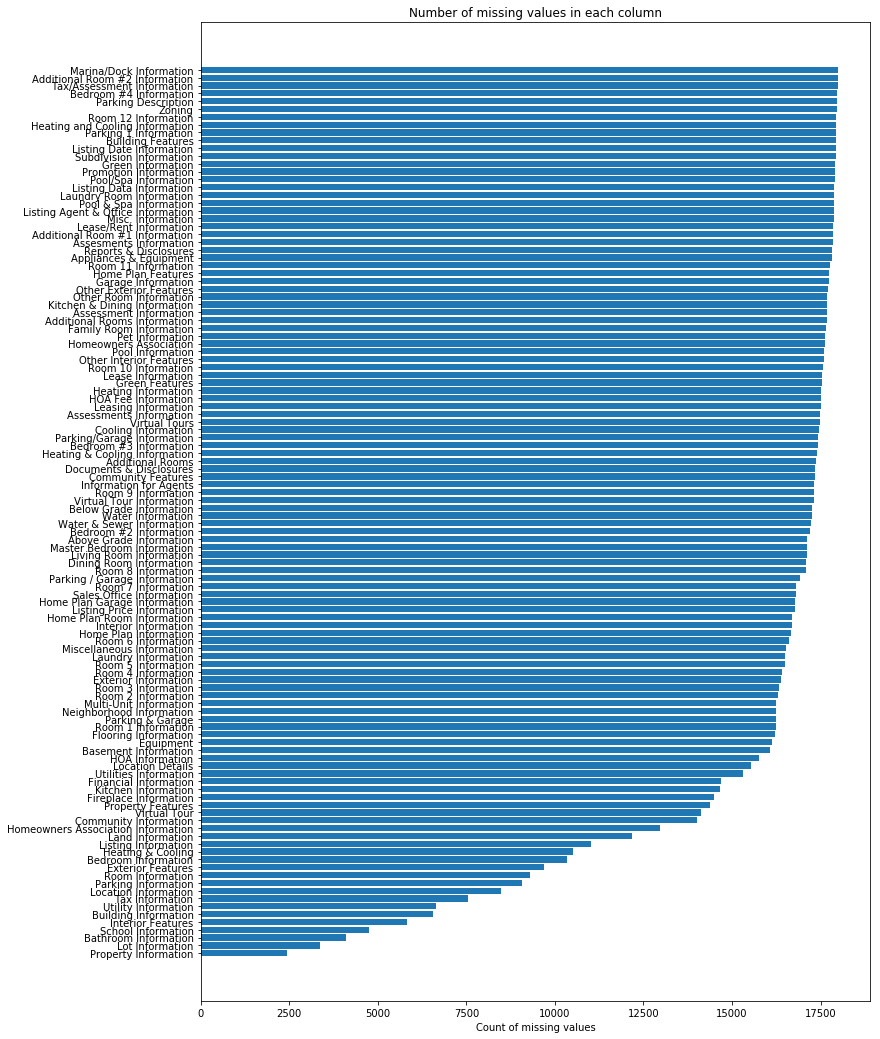

In [288]:
missing_df = new_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']<18000]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df.missing_count.values)
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

**From above plot, it seems that, lot of information is not present in all the listings. We can filter this more to consider data with missing values less than 15000 and plot again**

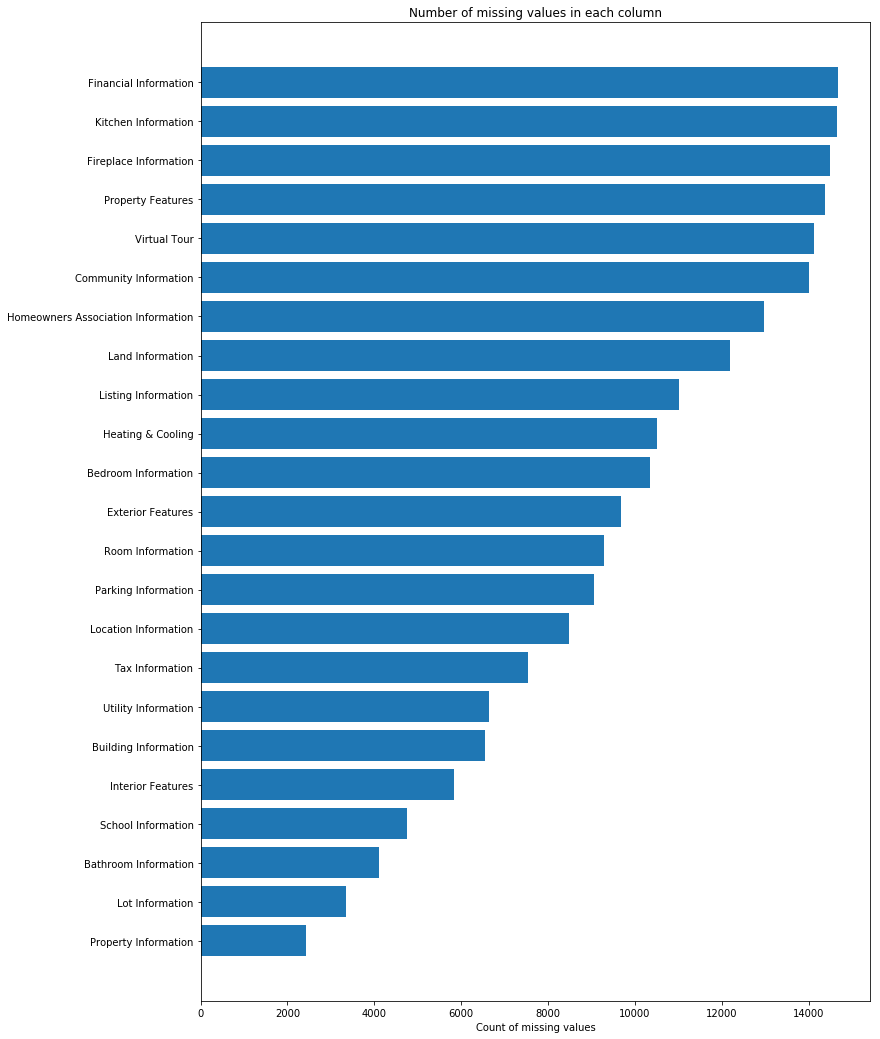

In [290]:
missing_df = new_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']<15000]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df.missing_count.values)
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

**Above plot gives us a set of important features to be considered. From y-label, we see that kitchen information is not present. We ll include that as well since that is one of the important room type. Additionally, even if less data is present for kitchen we can utilize that information to find features visually in other listings.**

**Now, let's define a set of important features. We then utilize regex match to find important columns**

In [0]:
features = ['interior features', 'interior information', 'exterior', 'kitchen', 'dining', 'bedroom', 
         'bathroom', 'living', 'fireplace', 'floor', 'building', 'pool', 'property details','property features','property information', 'parking', 'garage','Upper Level Features', 'window', 'Lot Features','Neighborhood','doors'
        ]

imp_features = [f2 for f in features for f2 in new_df.columns.to_list() if re.compile(f, re.IGNORECASE).match(f2)]

**I have defined above features based on plot data. Additionally, i individually check not null data(example shown in next cell) for atleast 50 or 100 listings. In a sense, whether the data present is sufficient to provide visual information**

In [391]:
list(imp_features)

['Interior Features',
 'Interior Information',
 'Exterior Features',
 'Exterior Information',
 'Exterior',
 'Kitchen Information',
 'Kitchen & Dining Information',
 'Kitchen/Dining Room',
 'Kitchen and Dining Room Information',
 'Kitchen Features',
 'Kitchen/Dining Room Information',
 'Kitchen/Dining Information',
 'Dining Room Information',
 'Dining Area Information',
 'Dining Information',
 'Dining/Kitchen Information',
 'Bedroom Information',
 'Bedroom #2 Information',
 'Bedroom #3 Information',
 'Bedroom #4 Information',
 'Bedroom and Bathroom Information',
 'Bedrooms Information',
 'Bedroom  #4 Information',
 'Bedroom 4 Information',
 'Bedroom 5 Information',
 'Bathroom Information',
 'Bathroom 1 Information',
 'Bathrooms Information',
 'Bathroom 2 Information',
 'Living Room Information',
 'Living Areas',
 'Living Room/Family Room Information',
 'Fireplace Information',
 'Fireplace Details',
 'Flooring Information',
 'Flooring',
 'Floor Information',
 'Building Information',
 'Bu

In [283]:
new_df['Roof Information'].dropna().sample(n=10).values, new_df['Exterior Features'].dropna().sample(n=10).values

(array([list(['Asphalt Shingle']), list(['Asphalt Shingle']),
        list(['Asphalt Shingle']),
        list(['Decking, Partially Floored, Permanent Stairs, Shingle-Composition']),
        list(['Asphalt Shingle']), list(['Shingle-Composition']),
        list(['Shingle-Composition']), list(['Shingle-Composition']),
        list(['Asphalt Shingle']), list(['Asphalt Shingle'])], dtype=object),
 array([list(['Back Yard Access, Fenced Backyard', 'Exterior Material: ', 'Stucco', 'Roof: ', 'Flat']),
        list(['Exterior Features: ', 'Storage Shed, Patio, Deck, Thermal Windows/Doors', 'Roof Description: ', 'Asphalt Shingle']),
        list(['Features: ', 'Fence']),
        list(['Garden Area, Out Building', 'Roof Type: ', 'Composition']),
        list(['Waterfront: ', 'Yes', 'Waterfront Footage: ', '157']),
        list(['Open Balcony']),
        list(['Fence, Front Porch, Patio, Sprinkler System, Yard']),
        list(['Roof: ', 'Asphalt/Fiberglass, Slate', 'Exterior: ', 'Vinyl']),
     

**As seen in example above, similar roof information is present in 'Exterior Features'. So, i exclude 'Roof Information'. Now, similarly we examine columns which contain numeric and drop the unimportant columns **

In [0]:
redundant_cols = ['Living Area ', 'Building 2 Information', 'Bedroom 1 Information', 'Bedroom & Bathroom Information', 'Bedroom #5 Information', 'Bedroom 2 Information','Bedroom 3 Information',  'Bathroom 3 Information','Bathroom #1 Information','Bathroom #2 Information','Bathroom #3 Information']

new_df.drop(redundant_cols, axis=1, inplace=True)

In [392]:
filtered_df = new_df[imp_features]
filtered_df.shape

(18269, 73)

In [395]:
filtered_df.head()

,Interior Features,Interior Information,Exterior Features,Exterior Information,Exterior,Kitchen Information,Kitchen & Dining Information,Kitchen/Dining Room,Kitchen and Dining Room Information,Kitchen Features,Kitchen/Dining Room Information,Kitchen/Dining Information,Dining Room Information,Dining Area Information,Dining Information,Dining/Kitchen Information,Bedroom Information,Bedroom #2 Information,Bedroom #3 Information,Bedroom #4 Information,Bedroom and Bathroom Information,Bedrooms Information,Bedroom #4 Information,Bedroom 4 Information,Bedroom 5 Information,Bathroom Information,Bathroom 1 Information,Bathrooms Information,Bathroom 2 Information,Living Room Information,Living Areas,Living Room/Family Room Information,Fireplace Information,Fireplace Details,Flooring Information,Flooring,Floor Information,Building Information,Building Features,Building 1 Information,Pool Information,Pool/Spa Information,Pool & Spa Information,Pool & Spa,Property Details,Property Features,Property Information,Parking Information,Parking & Garage,Parking / Garage Information,Parking/Garage Information,Parking Space Information,Parking Description,Parking Restrictions,Parking & Garage Features,Parking & Garage Information,Parking 1 Information,Parking 2 Information,Parking / Garage,Parking,Parking 3 Information,Garage Information,Garage/Parking Information,Garage & Parking,Garage,Garage/Carport,Upper Level Features,Windows and Doors,Window Information,Lot Features,Neighborhood Information,Neighborhoods Information,Neighborhood
0,"[# of Fireplaces: , 1, Fireplace Type: , Facto...",NaN,"[Roof Type: , Composition, Tile]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[# of Bathrooms (Full): , 5]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Construction Status: , Under Construction]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Neighborhood Association, Sidewalks, Street L...","[Construction: , Brick Front, Concrete Siding,...","[3 Car Or More, Attached, Kitchen Level Entry]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,"[Equipment Appliances: , Dishwasher, Disposal,...",NaN,"[High Impact Doors, Patio]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Dining Description: , Dining/Living Room]",NaN,NaN,NaN,"[Bedroom Description: , At Least 1 Bedroom Gro...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[# of Baths (Full): , 2, Combination Tub & Sho...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Construction Type: , Concrete Block Construct...",NaN,NaN,"[Has Pool, Below Ground Pool, Pool Dimensions:...",NaN,NaN,NaN,NaN,NaN,"[Pool Only, One Story, Detached, Parcel Number...","[# of Carport Spaces: , 3, Carport Description...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[Appliances: , Built-In Oven, Cooktop, Dishwas...",NaN,"[Exterior Features: , Hurricane Shutters, Irri...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[# of Full Bathrooms: , 4]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Flooring: , Carpet, Ceramic Tile]",NaN,NaN,"[Year Built: , 2018, New Construction, Constru...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Living Area: , 3,574, Living Area Units: , Sq...",NaN,"[Has Garage, Has Attached Garage, Garage Space...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Subdivision Name: , WATERSET PHASE 5A-1]",NaN,NaN
3,"[Appliances: , Dishwasher, Disposal, Dryer, El...",NaN,"[Exterior Features: , Fenced, Sidewalk, Patio ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[# of Full Bathrooms: , 2]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Flooring: , Ceramic Tile, Engineered Hardwood]",NaN,NaN,"[Year Built: , 1981, Construction Materials: ,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Living Area: , 1,012, Living Area Units: , Sq...",NaN,"[Parking Features: , Driveway, Has Garage, Has...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

**From above analysis, we were able to reduce number of features from ~500 to 73. For further reduction, we can combine columns which have similar names. For example, all kitchen related columns can be combined into one**

In [0]:
kitchen_df = filtered_df[[col for col in list(filtered_df.columns) if 'Kitchen' in col]]

In [516]:
kitchen_df.fillna('',inplace=True)
kitchen_df=kitchen_df.applymap(lambda x:[] if x=='' else x)
kitchen_df.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


,Kitchen Information,Kitchen & Dining Information,Kitchen/Dining Room,Kitchen and Dining Room Information,Kitchen Features,Kitchen/Dining Room Information,Kitchen/Dining Information,Dining/Kitchen Information
0,[],[],[],[],[],[],[],[]
1,[],[],[],[],[],[],[],[]
2,[],[],[],[],[],[],[],[]
3,[],[],[],[],[],[],[],[]
4,[],[],[],[],[],[],[],[]


In [0]:
columns = kitchen_df.columns.to_list()

In [0]:
col_data = list()
for col in columns:
    col_data+= kitchen_df[col]    
    
kitchen_df['kitchen_info'] = col_data

In [0]:
kitchen_df.drop(columns, axis = 1, inplace = True)

In [524]:
kitchen_df['kitchen_info'].sample(n=10).values

array([list(['Sq. Ft.: ', '90', 'Length (Ft.): ', '10', 'Width (Ft.): ', '9', 'Level: ', 'Main', 'Appliances: ', 'Built-in Dishwasher, Disposal, Tile, Free-Standing Range, Freestanding Refrigerator, Range Hood', 'Features: ', 'Hardwood Floors, Sky Light, Plumbed for Icemaker']),
       list([]), list([]),
       list(['Kitchen Dimensions: ', '13 x 13', 'Oven Description: ', 'Other (See Remarks)', 'Oven Source: ', 'Gas', 'Range Source: ', 'Gas', 'Range Description: ', 'Stove']),
       list(['Included Kitchen Features: ', 'Breakfast Bar, Dishwasher, Disposal, Double Oven, Microwave, Oven/Range Built-In, Pantry, Other, Island, Granite/Tile Counters', 'Kitchen Level: ', 'Main']),
       list([]), list([]), list([]), list([]), list([])], dtype=object)

In [0]:
kitchen_df.to_csv('kitchen_info.csv')

We can now use this to find important labels for **kitchen** class